# Playstore Analysis 

### Importing required modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Access the dataset

In [2]:
df=pd.read_csv('C:/Users/HP/Desktop/1.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.shape

(10841, 13)

## 1. Data clean up – Missing value treatment

### Checking for null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [7]:
df.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### 1(a). Drop records where rating is missing since rating is our target/study variable

In [9]:
df.dropna(how='any', subset=['Rating'], axis=0, inplace = True)

In [10]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

##### All the records with missing rating values have been removed

#### 1(b). Check the null values for the Android Ver column

#### i.Are all 3 records having the same problem?

In [12]:
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


##### Yes,All 3 records are having same problem i.e Android Ver column is having null value

#### ii. Drop the 3rd record i.e. record for “Life Made WIFI"

In [13]:
df.drop([10472], inplace = True)

In [14]:
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


##### Record for "life made WIFI" has been dropped

#### iii. Replace remaining missing values with the mode

In [15]:
df['Android Ver'].mode()[0]  #most frequent value to replace missing 'Android Ver'

'4.1 and up'

In [16]:
df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace=True)

In [17]:
df.isnull().sum()  

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

##### All missing values in 'Android Ver' have been replaced 

#### 1(c). Current ver – replace with most common value

In [18]:
df['Current Ver'].mode()[0]  #most frequent value to replace missing 'Current Ver'

'Varies with device'

In [19]:
df['Current Ver'].fillna(df['Current Ver'].mode()[0], inplace=True)

In [20]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

##### All the missing values in 'Current Ver' have been replaced

## 2. Data clean up – correcting the data types

### Checking the datatype of each variables

In [21]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### 2(a). Which all variables need to be brought to numeric types?

##### Reviews,Installs, and Price should be brought to numeric types

#### 2(b).Price variable – remove $ sign and convert to float

In [23]:
#removal of $ sign
price = []                                    
for i in df['Price']:               
    if i[0]=='$':                    
        price.append(i[1:])
    else:
        price.append(i)

In [24]:
#changing to float
df.drop(labels=df[df['Price']=='Everyone'].index, inplace = True)
df['Price']= price
df['Price']= df['Price'].astype('float')

In [29]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

##### Price variable has been changed to float

#### 2(c). Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [31]:
install = []
for j in df['Installs']:
    install.append(j.replace(',','').replace('+','').strip())

df['Installs']= install
df['Installs']= df['Installs'].astype('int')

In [39]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

##### Installs have been converted to integers

#### 2(d). Convert all other identified columns to numeric

In [40]:
df['Reviews']= df['Reviews'].astype('int')

In [41]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### Reviews have been converted to integers

## 3. Sanity checks – check for the following and handle accordingly

#### 3(a). Avg. rating should be between 1 and 5, as only these values are allowed on the play store
#### i. Are there any such records? Drop if so.

In [42]:
df.loc[df.Rating < 1] & df.loc[df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


##### There  is no such record,there was an entry with rating 19,'Life Made WI-Fi' which has been already removed

#### 3(b). Reviews should not be more than installs as only those who installed can review the app.
#### i. Are there any such records? Drop if so.

In [43]:
df.loc[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


##### There are 7 such records 

In [44]:
#removing the entries with 'Reviews'>'Installs' 
temp = df[df['Reviews']>df['Installs']].index
df.drop(labels=temp, inplace=True)

In [45]:
df.loc[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


##### All the records with 'Reviews'>'Installs' have been removed

## 4. Identify and handle outliers –

#### 4(a). Price column
#### i.Make suitable plot to identify outliers in price

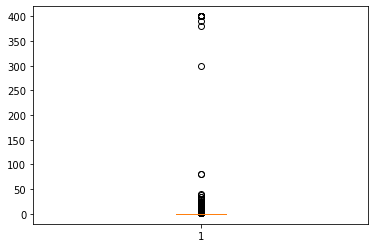

In [46]:
plt.boxplot(df['Price'])
plt.show()

#### ii. Do you expect apps on the play store to cost $200? Check out these cases

##### Clearly,few apps cost more than $200 on the play store

#### iii. Limit data to records with price < $30

In [47]:
hi_30 = df[df['Price'] > 30].index
df.drop(labels=hi_30, inplace=True)

In [48]:
df.loc[df['Price'] > 30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


##### All records which cost more than $30 have been removed

#### iv. After dropping the useless records, make the suitable plot again to identify outliers


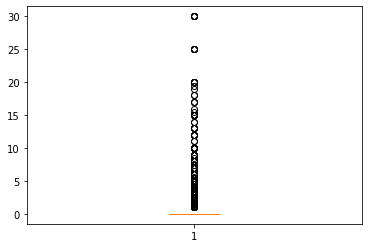

In [49]:
plt.boxplot(df['Price'])
plt.show()

#### 4(b). Reviews column
#### i. Make suitable plot

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


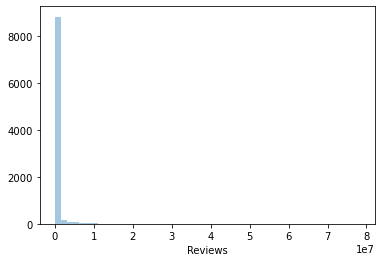

In [67]:
sns.distplot(df['Reviews'],kde=False)
plt.show()

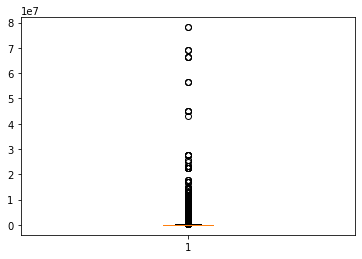

In [71]:
plt.boxplot(df['Reviews'])
plt.show()

#### ii. Limit data to apps with < 1 Million reviews

In [72]:
#dropping the app entries with >1 million reviews
hi_1m = df[df['Reviews'] > 1000000 ].index
df.drop(labels = hi_1m, inplace=True)

In [73]:
print(hi_1m.value_counts().sum(),'dropped')

704 dropped


##### 704 apps with > 1 Million reviews removed

#### 4(c). Installs

#### i. What is the 95th percentile of the installs?

In [75]:
per = df.Installs.quantile(0.95)
print(per)

10000000.0


##### the 95th percentile of the 'Installs' is 10000000.0

#### ii. Drop records having a value more than the 95th percentile

In [77]:
#dropping the records having a value more than the 95th percentile
temp1 = df[df["Installs"] > per].index
df.drop(labels = temp1, inplace = True)

In [78]:
print(temp1.value_counts().sum())

199


##### These are the total values dropped

## Data analysis to answer business questions

### 5. What is the distribution of ratings like? More skewed towards higher/lower values?

#### 5(a). How do you explain this?

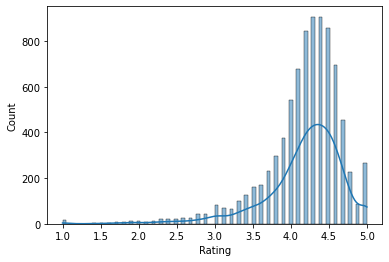

The skewness of this distribution is -1.7434270330647985


In [88]:
sns.histplot(df['Rating'],kde=True)
plt.show()
print('The skewness of this distribution is',df['Rating'].skew())

### Calculating median,mean and mode

In [83]:
df.Rating.median()

4.3

In [84]:
df.Rating.mean()

4.170800237107298

In [86]:
df.Rating.mode()[0]

4.3

##### Hence,mode>= median > mean,so the distribution is left skewed or negatively skewed

#### 5(b).What is the implication of this on your analysis?

##### The skewness of this distribution is -1.7434270330647985
##### mode>= median > mean,so the distribution is left skewed or negatively skewed
##### Therefore distribution of Rating is more Skewed towards lower values.

### 6. What are the top Content Rating values?

In [89]:
df['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

#### 6(a). Are there any values with very few records?

##### Yes,'Adults only 18+' and 'Unrated' have very few values

#### b. If yes, drop those as they won’t help in the analysis

In [91]:
#drop the app entries having 'Content Rating' as 'Adults only 18+'
df.drop(df[df['Content Rating']=='Adults only 18+'].index,inplace=True)

In [93]:
#drop the app entries having 'Content Rating' as 'Unrated'
df.drop(df[df['Content Rating']=='Unrated'].index,inplace=True)

In [94]:
df['Content Rating'].value_counts()

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

##### Values with very few records have been dropped

### 7. Effect of size on rating

#### 7(a). Make a joinplot to understand the effect of size on rating

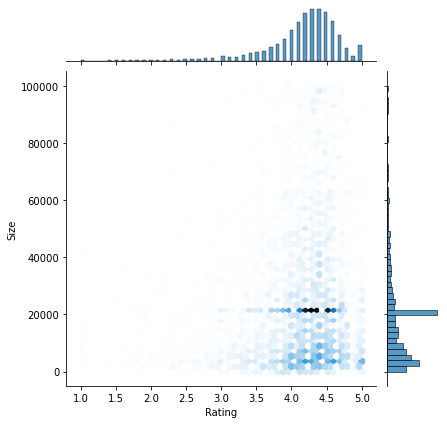

In [98]:
sns.jointplot(y ='Rating', x ='Price', data = df, kind ='hex')
plt.show()

#### 7(b). Do you see any patterns?

##### Yes, a pattern can be observerd i.e there is a correlation between 'Rating' and 'Size'

#### 7(c). How do you explain the pattern?

##### In general ,there is a positive correlation between 'Size' and 'Rating' i.e as the 'Rating' increases ,'Size' also increases.However ,this pattern is not valid for very high 'Ratings' as at a certain point ,'Size' stops increasing

### 8. Effect of price on rating

#### 8(a). Make a jointplot (with regression line)

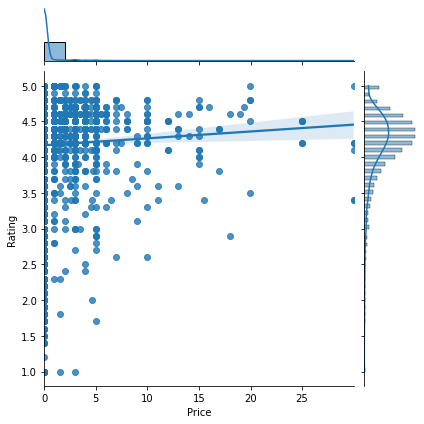

In [101]:
sns.jointplot(y ='Rating', x ='Price', data = df, kind ='reg')
plt.show()

#### 7(b). What pattern do you see?

##### A weak correlation can be seen between 'Price' and 'Rating'

#### 7(c). How do you explain the pattern?

##### Since there is a weak but positive correlation between 'Price' and 'Rating',as the 'Price' increases ,'Rating' slightly  increases
##### 'Rating' almost constantly remains above 4 with increase in 'Price'

#### 7(d). Replot the data, this time with only records with price > 0

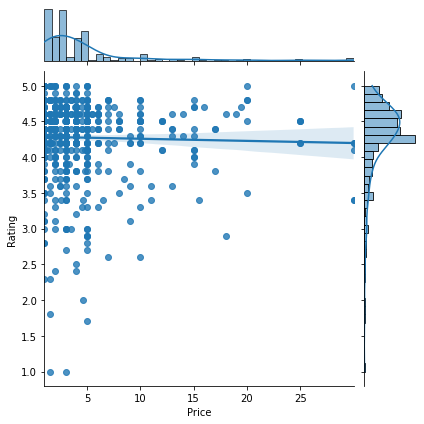

In [102]:
df1=df.loc[df.Price>0]
sns.jointplot(x='Price', y='Rating', data=df1, kind='reg')
plt.show()

#### 7(e). Does the pattern change?

##### Yes, there is a change in pattern
##### Now there is a very weak negative correlation between 'Price' and 'Rating'

#### 7(f). What is your overall inference on the effect of price on the rating?

##### In general the 'Price' and 'Rating' are weakly positively Correlated whereas for higher 'Price','Rating' is genarally 4+ 

### 9. Look at all the numeric interactions together –
#### a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

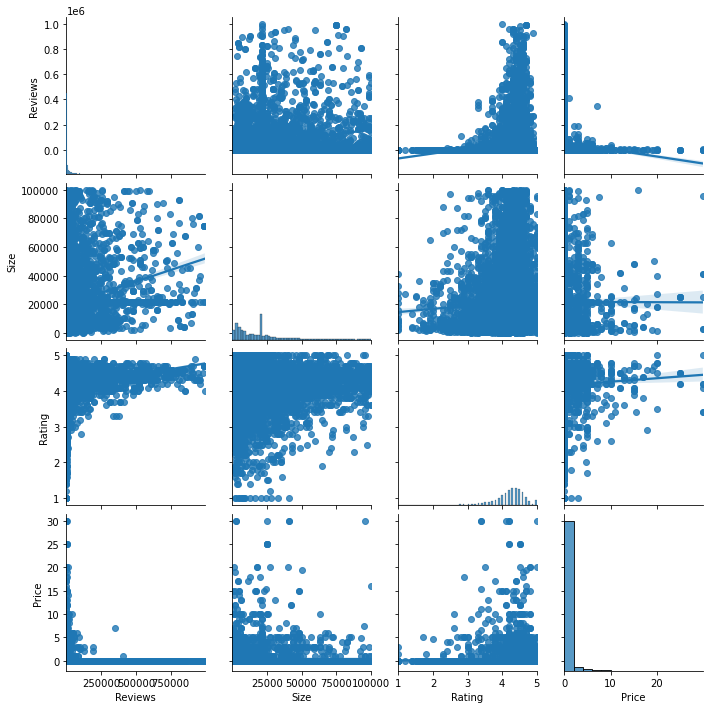

In [103]:
sns.pairplot(df, vars=['Reviews', 'Size', 'Rating', 'Price'], kind='reg')
plt.show()

### 10. Rating vs. content rating
#### 10(a). Make a bar plot displaying the rating for each content rating

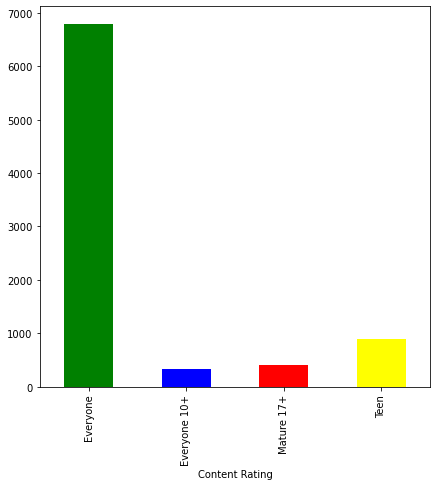

In [110]:
df.groupby(['Content Rating'])['Rating'].count().plot.bar(color=['green','blue','red','yellow'],figsize=(7,7))
plt.show()

#### 10(b). Which metric would you use? Mean? Median? Some other quantile?

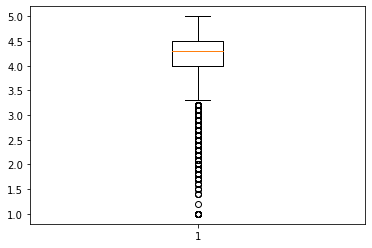

In [111]:
plt.boxplot(df['Rating'])
plt.show()

##### There are few outliers in 'Rating',so Median is the best metric to find the middle point value in this case

#### 10(c). Choose the right metric and plot

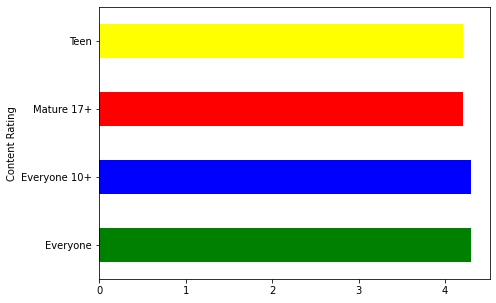

In [113]:
df.groupby(['Content Rating'])['Rating'].median().plot.barh(color=['green','blue','red','yellow'],figsize=(7,5))
plt.show()

### 11. Content rating vs. size vs. rating – 3 variables at a time
#### 11.(a)Create 5 buckets (20% records in each) based on Size

In [114]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
df['Bucket Size'] = pd.cut(df['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.145730,4.247561,4.010582,4.182240
20k-40k,4.200195,4.169811,4.156291,4.170432
40k-60k,4.167083,4.263636,4.190476,4.237383
60k-80k,4.245408,4.280769,4.200000,4.274194
80k-100k,4.260127,4.304762,4.252632,4.270313


#### 11.(b) .By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [115]:
temp3=pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
temp3

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.80,4.02,3.5,3.9
20k-40k,4.00,4.00,4.0,3.9
40k-60k,3.90,4.06,4.1,4.0
60k-80k,4.00,4.00,4.0,4.0
80k-100k,4.04,4.10,4.0,4.0


#### 11(c). Make a heatmap of this
#### i. Annotated

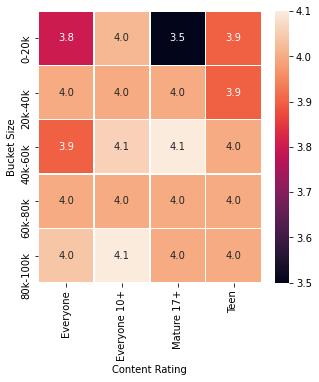

In [116]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(temp3, annot=True, linewidths=.5, fmt='.1f',ax=ax)
plt.show()

#### ii. Greens color map

In [121]:
sns.heatmap(temp3, annot=True, linewidths=.5, cmap='Greens',fmt='.1f',ax=ax)
plt.show()

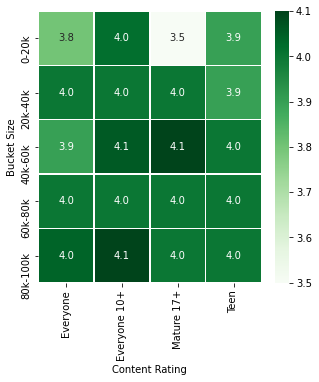

In [122]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(temp3, annot=True, linewidths=.5, cmap='Greens',fmt='.1f',ax=ax)
plt.show()

#### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

##### Based on analysis,it is not true that lighter apps are preferred in all the categories as apps of Size 60k-80k and80k-100k have highest rating in all the categories